<a href="https://colab.research.google.com/github/rahul70245/Classification-Models/blob/main/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

from imblearn.combine import SMOTETomek

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# checking for null entries

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# dropping the duplicated entries

df.duplicated().sum()


3854

In [ ]:
df.drop_duplicates(inplace=True)

EXPLORATORY DATA ANALYSIS and DATA MANIPULATION

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


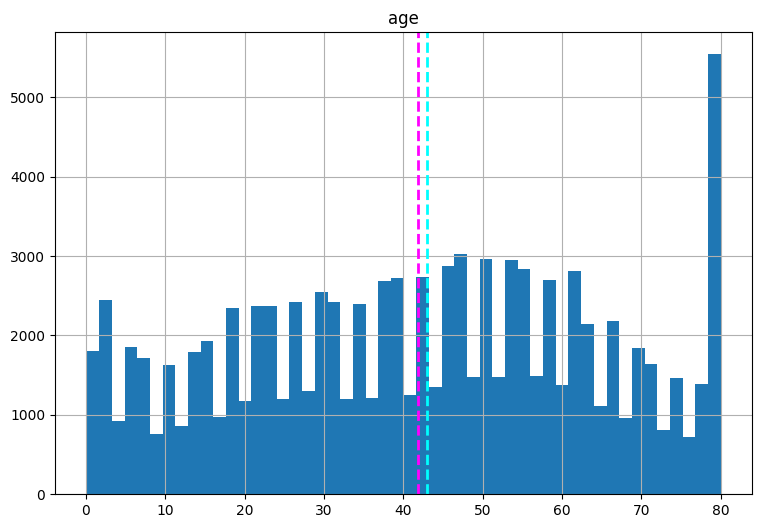

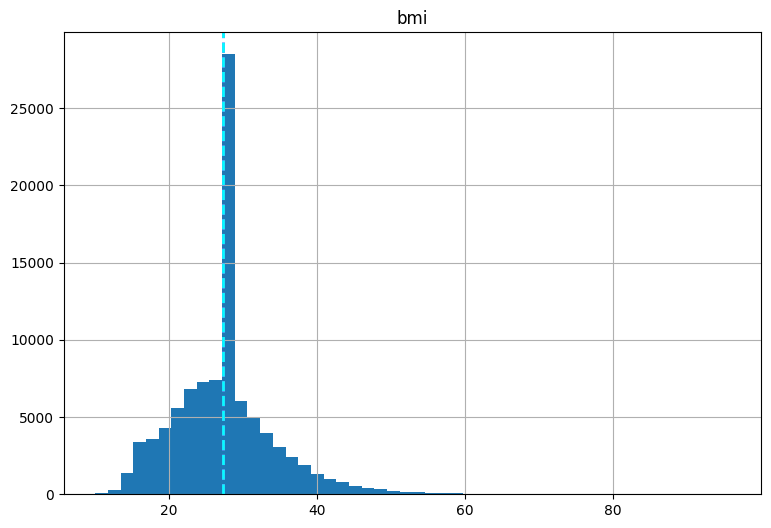

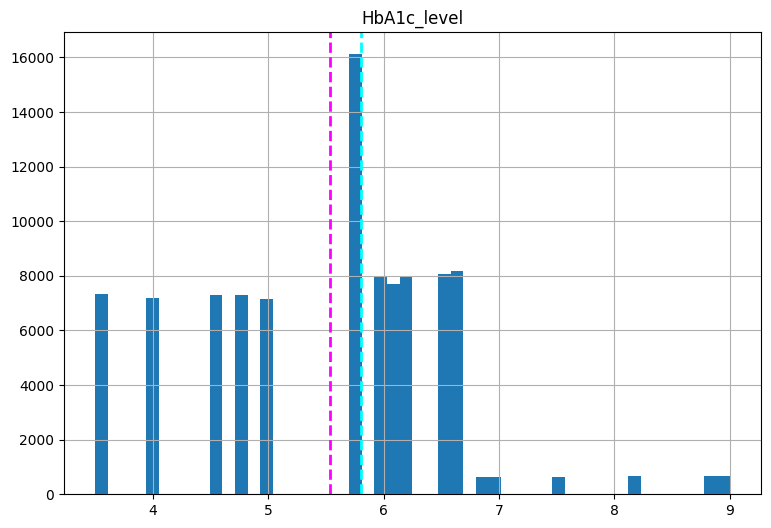

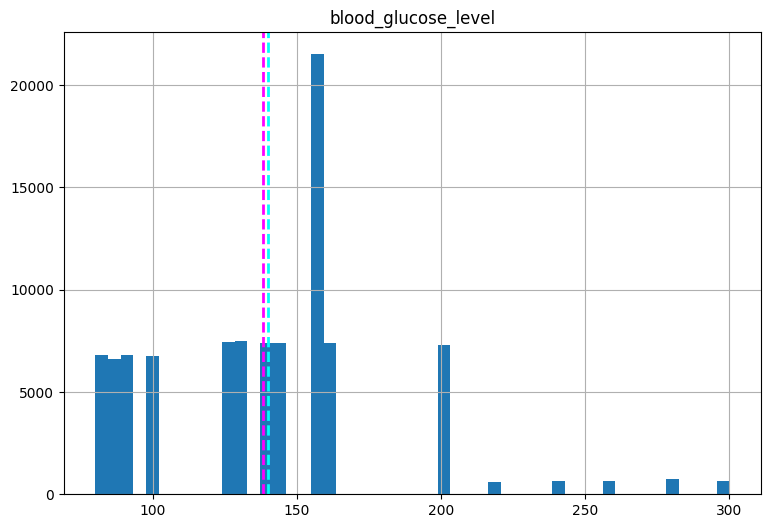

In [ ]:
# distribution, skewness, mean, median of numerical features

n=['age','bmi','HbA1c_level','blood_glucose_level']

for col in n:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [ ]:
# removing the rows where gender is others as it is in small amount

df=df[df['gender']!='Other']

In [ ]:
df['hypertension'].unique()

array([0, 1])

In [ ]:
df['heart_disease'].unique()

array([1, 0])

In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['diabetes'].unique()

array([0, 1])

In [ ]:
df['diabetes'].value_counts()   # heavy imbalance data

0    87646
1     8482
Name: diabetes, dtype: int64

In [ ]:
87646/(87646+8482)

0.9117634820239681

<ipython-input-1144-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

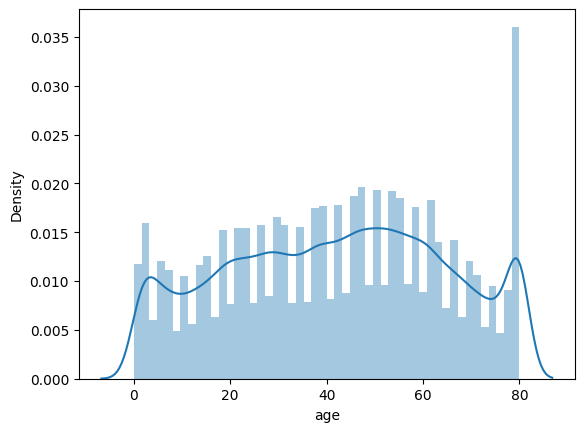

In [ ]:
sns.distplot(df['age'])

<Axes: ylabel='gender'>

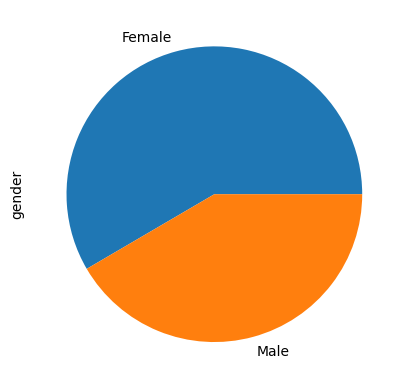

In [ ]:
df['gender'].value_counts().plot(kind='pie')

<Axes: >

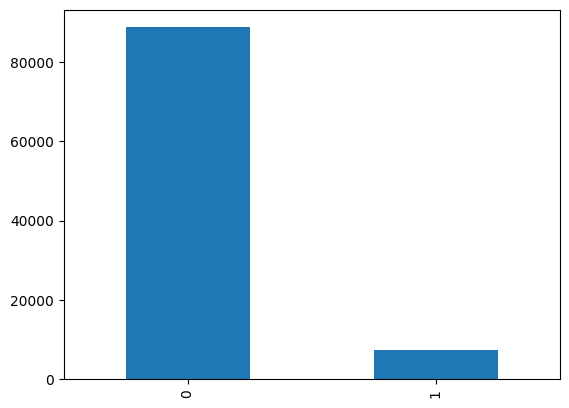

In [ ]:
df['hypertension'].value_counts().plot(kind='bar')

<Axes: >

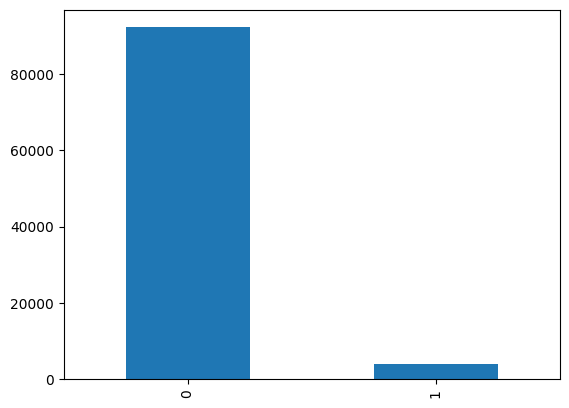

In [ ]:
df['heart_disease'].value_counts().plot(kind='bar')

<Axes: >

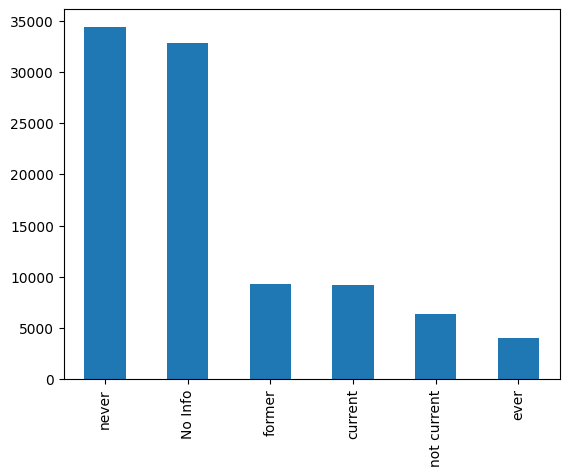

In [ ]:
df['smoking_history'].value_counts().plot(kind='bar')

In [ ]:
 # bivariate

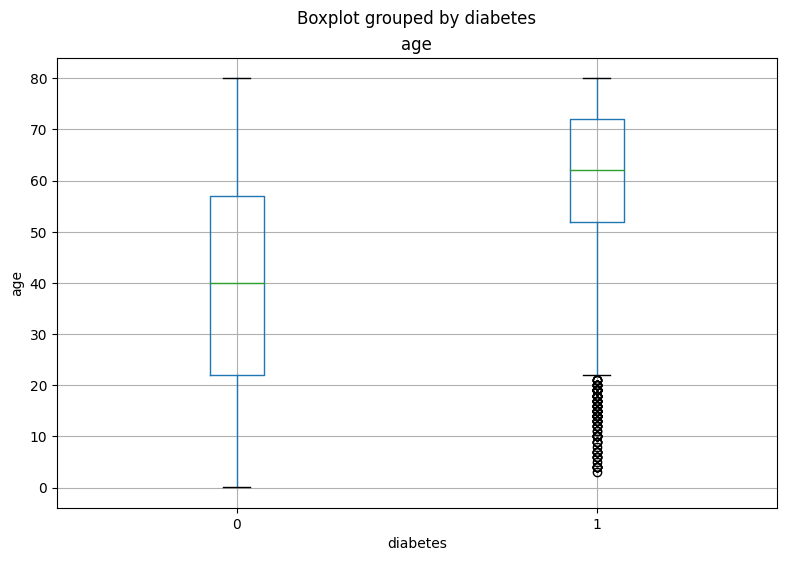

In [ ]:
# age with diabetes....showing distribution of age with diabetes category

fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'age', by = 'diabetes', ax = ax)
ax.set_ylabel("age")
plt.show()

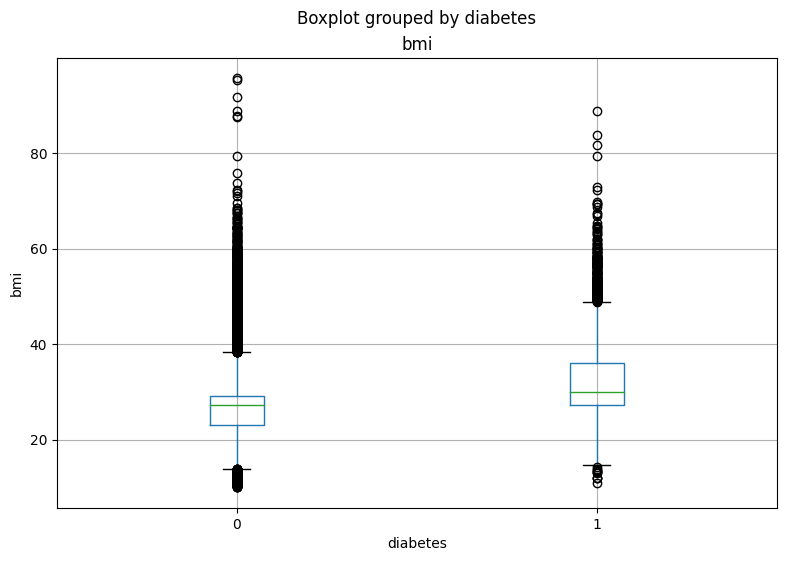

In [ ]:
#  bmi with diabetes

fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'bmi', by = 'diabetes', ax = ax)
ax.set_ylabel("bmi")
plt.show()

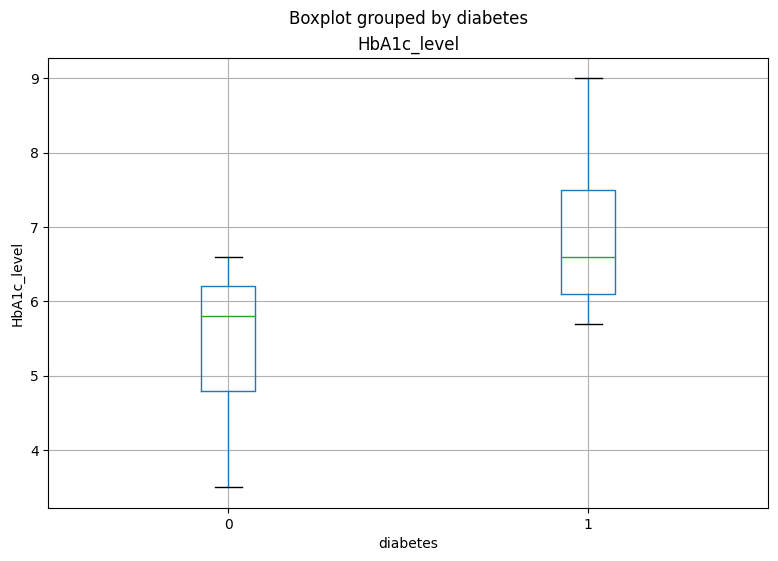

In [ ]:
#   HbA1c_level with diabetes

fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'HbA1c_level', by = 'diabetes', ax = ax)
ax.set_ylabel("HbA1c_level")
plt.show()

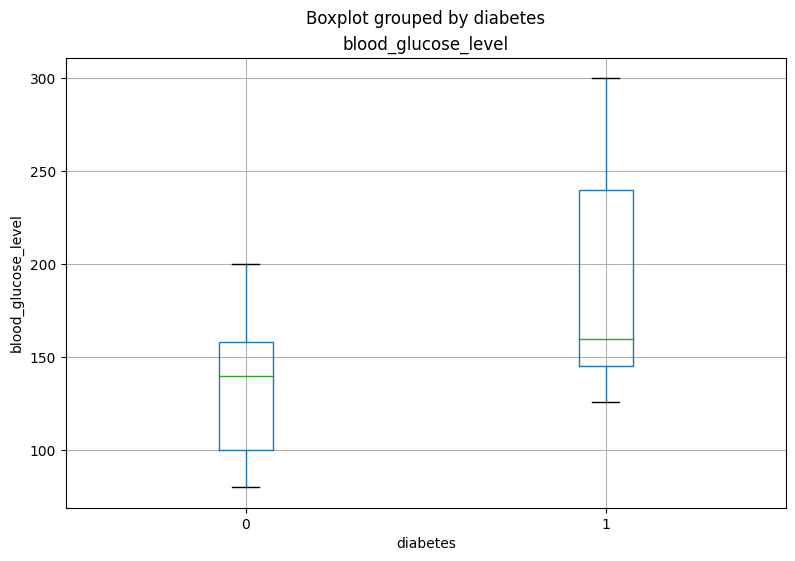

In [ ]:
#   blood_glucose_level with diabetes

fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'blood_glucose_level', by = 'diabetes', ax = ax)
ax.set_ylabel("blood_glucose_level")
plt.show()

In [ ]:
# gender wise distribution of diabetic or not diabetic

df.groupby(['gender'])['diabetes'].value_counts().unstack()

diabetes,0,1
gender,,
Female,51714,4447
Male,35932,4035


<ipython-input-1155-45cc4edbb964>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

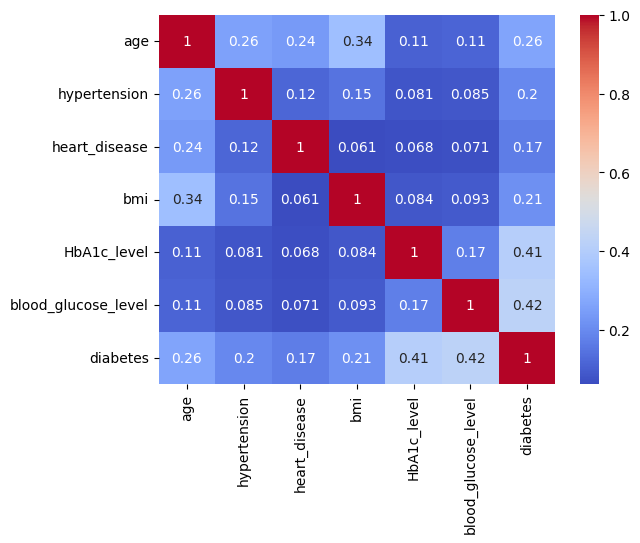

In [ ]:
# checking for multicollinearity

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [ ]:
# dealing with smoke_history column

def categorizing(s):
  if s in ['ever','not current','former']:
    return 'past_smoker'
  elif s =='never':
    return 'non_smoker'
  elif s=='current':
    return 'smoker'
  elif s=='No Info':
    return 'no_info'

In [ ]:
df['smoking_history']=df['smoking_history'].apply(categorizing)

<ipython-input-1158-b5242e04ccb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history']=df['smoking_history'].apply(categorizing)


In [ ]:
df['smoking_history'].value_counts()

non_smoker     34395
no_info        32881
past_smoker    19655
smoker          9197
Name: smoking_history, dtype: int64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non_smoker,25.19,6.6,140,0
1,Female,54.0,0,0,no_info,27.32,6.6,80,0
2,Male,28.0,0,0,non_smoker,27.32,5.7,158,0
3,Female,36.0,0,0,smoker,23.45,5.0,155,0
4,Male,76.0,1,1,smoker,20.14,4.8,155,0


In [ ]:
# the data is cleaned now and ready to pre-process

PRE-PROCESSING OF DATA

In [ ]:
# one hot encoding as the data is not a ordinal one

In [ ]:
df=pd.get_dummies(df,columns=['gender','smoking_history'], prefix=['g','status'])

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,g_Female,g_Male,status_no_info,status_non_smoker,status_past_smoker,status_smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0,1
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,1


<Axes: >

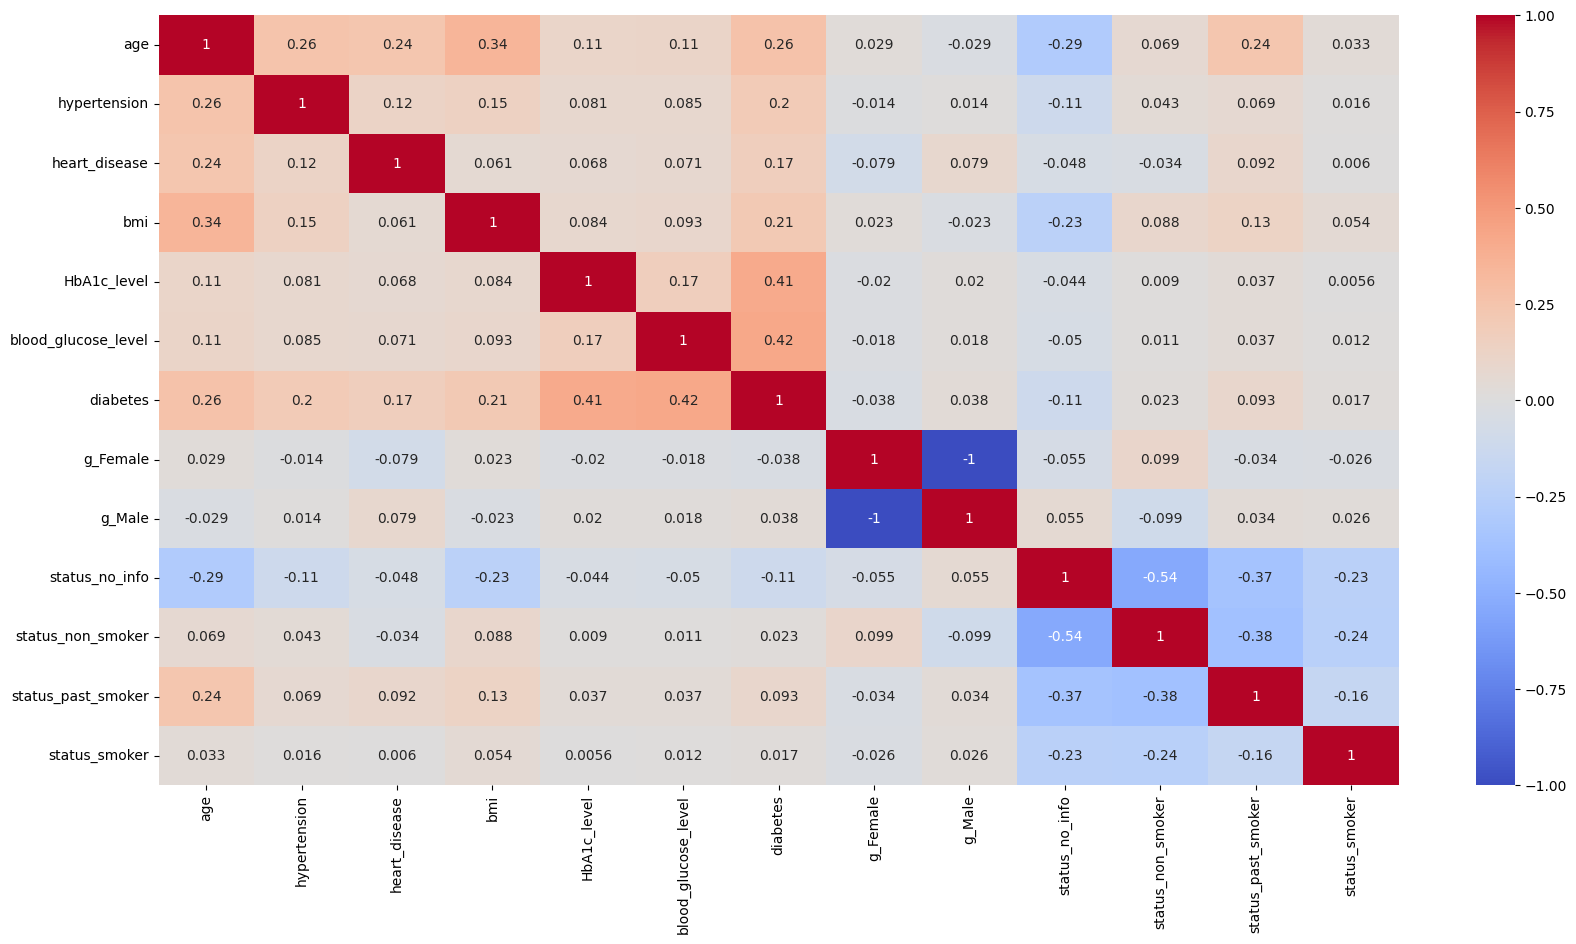

In [ ]:
# one more time checkink correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, cmap='coolwarm')

In [ ]:
x=df.drop(['diabetes'], axis=1)
y=df['diabetes']

TRAINING THE LOGISTIC REGRESSION MODEL

In [ ]:
# splitting the dataset

x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)

In [ ]:
# rescalling the x_train and x_test

scaler= StandardScaler()
x_test=scaler.fit_transform(x_test)
x_train=scaler.transform(x_train)

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
clf.coef_

array([[ 1.04013942,  0.19087276,  0.14032364,  0.58165815,  2.48944855,
         1.3662107 , -0.0712662 ,  0.0712662 , -0.15604029,  0.05775095,
         0.05955128,  0.07449798]])

In [ ]:
clf.intercept_

array([-5.18554103])

PREDICTION

In [ ]:
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)

[[17353   155]
 [  643  1075]]


<Axes: >

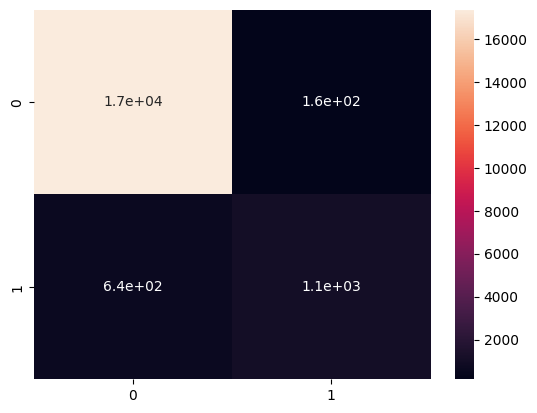

In [ ]:
# making confusion matrix for test data

cm1 = confusion_matrix(y_test, test_class_preds)
print (cm1)
sns.heatmap(cm1, annot=True)

[[69478   660]
 [ 2490  4274]]


<Axes: >

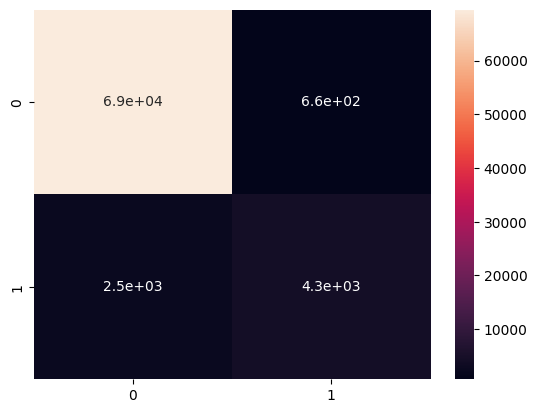

In [ ]:
# making cm for training data

cm = confusion_matrix(y_train, train_class_preds)
print(cm)
sns.heatmap(cm, annot=True)

EVOLUTION METRICES

In [ ]:
# as it is heavy imbalance data so we can't use accuracy_score
# we can use recall, prescion, f1 score

In [ ]:
# precision for training
precision_score(y_train, train_class_preds)

0.8662342926631537

In [ ]:
# precision for test
precision_score(y_test, test_class_preds)

0.8739837398373984

In [ ]:
# recall for training
recall_score(y_train, train_class_preds)

0.6318746303962153

In [ ]:
# recall for test
recall_score(y_test, test_class_preds)

0.6257275902211874

In [ ]:
# f beta \ f1 score score for training
f1_score(y_train, train_class_preds)

0.7307232005471022

In [ ]:
#f beta / f1 score score for test
f1_score(y_test, test_class_preds)

0.7293080054274084

In [ ]:
#roc_auc_score for training data
roc_auc_score(y_train,train_class_preds)

0.811232305075207

In [ ]:
#roc_auc_score for test data
roc_auc_score(y_test,test_class_preds)

0.80843724724676

DEALING WITH IMBALNCING IN DATA

to deal with imbalancing here I have used the combination of both methods i.e. undersampling and oversampling beacause I don't have a domain knowledge basically. SMOTETomek is a method in which a synthetic data is generated of lower amount category and cutting of higher amount category until it reaches at the same amount.

In [ ]:
df['diabetes'].value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

In [ ]:
smk=SMOTETomek(random_state=10)
X,Y= smk.fit_resample(x,y)

In [ ]:
y.value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

In [ ]:
Y.value_counts()

0    87337
1    87337
Name: diabetes, dtype: int64

AGAIN TRAINING LOGISTIC REGRESSION MODEL AFTER HANDLING IMBALANCE DATA

In [ ]:
# AGAIN splitting the dataset

X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0)

In [ ]:
# AGAIN rescalling the x_train and x_test

scaler= StandardScaler()
X_test=scaler.fit_transform(X_test)
X_train=scaler.transform(X_train)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
clf.coef_

array([[ 1.48899417, -0.05761947, -0.04825299,  0.6717278 ,  3.03024865,
         1.84664586, -4.32416815, -3.99485362, -3.90264981, -3.92302915,
        -3.41245302, -2.22863051]])

In [ ]:
clf.intercept_

array([2.27944362])

AGAIN PREDICTION

In [ ]:
train_c_preds = clf.predict(X_train)
test_c_preds = clf.predict(X_test)

[[16478   878]
 [ 1330 16249]]


<Axes: >

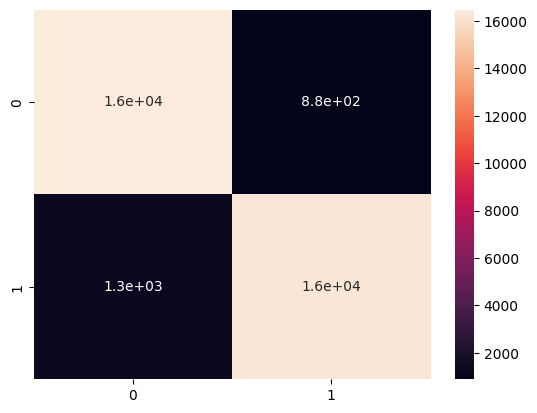

In [ ]:
# making confusion matrix for test data

cm1 = confusion_matrix(Y_test, test_c_preds)
print (cm1)
sns.heatmap(cm1, annot=True)

[[66466  3515]
 [ 5320 64438]]


<Axes: >

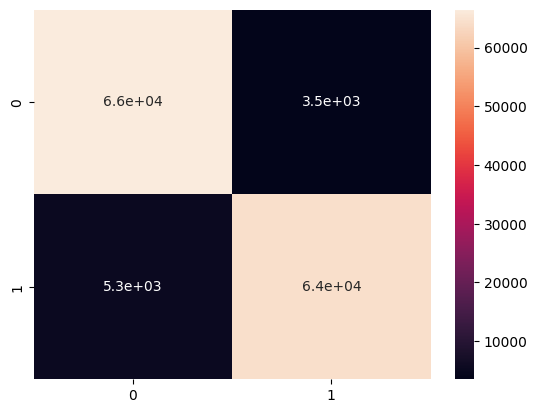

In [ ]:
# making cm for training data

cm = confusion_matrix(Y_train, train_c_preds)
print(cm)
sns.heatmap(cm, annot=True)

EVOLUTION METRICES AGAIN

In [ ]:
# it is now balanced data so we can use accuracy_score

In [ ]:
# accuracy for training data
accuracy_score(Y_train,train_c_preds)

0.9367749876555579

In [ ]:
# accuracy for test data
accuracy_score(Y_test,test_c_preds)

0.9367969085444396

In [ ]:
# f1 score for train data
f1_score(Y_train,train_c_preds)

0.9358439049894344

In [ ]:
# f1 score for test data
f1_score(Y_test,test_c_preds)

0.9363798766783842

In [ ]:
#roc_auc_score for training data
roc_auc_score(Y_train,train_c_preds)

0.9367542133227621

In [ ]:
#roc_auc_score for test data
roc_auc_score(Y_test,test_c_preds)

0.9368769254353846

I tried training model on balanced data and imbalanced data.
as a result I can say treating imbalance data in classification problem can make your model's accuracy really impressive.

TRAINING DECISION TREE AFTER TREATING IMBALANCE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
c=DecisionTreeClassifier(criterion='entropy')
c.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
train__preds = clf.predict(X_train)
test__preds = clf.predict(X_test)

In [ ]:
# f1 score for train data
roc_auc_score(Y_train,train__preds)

0.9367542133227621

In [ ]:
# f1 score for test data
roc_auc_score(Y_test,test__preds)

0.9368769254353846

[[16478   878]
 [ 1330 16249]]


<Axes: >

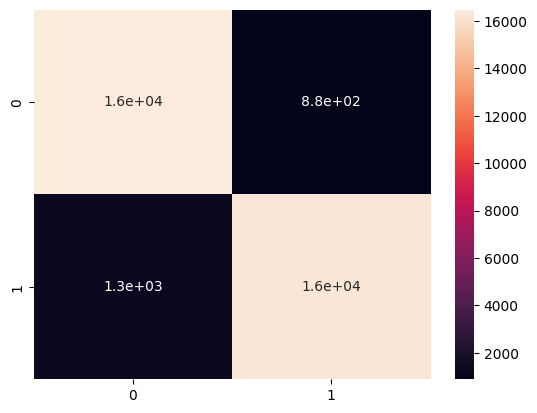

In [ ]:
# making confusion matrix for test data

cm1 = confusion_matrix(Y_test, test__preds)
print (cm1)
sns.heatmap(cm1, annot=True)

so the difference between logistic regression model and decision tree the accuracy is somewhat same. so I don't suggest usage of decision tree and more complex models.